# ASI ASSESSMENT 2015/2016
<p style="text-align:right";>_Realized by **Achille SALAÜN**_</p>

<p style="text-align:justify";>*In this work you will analyze two datasets on wine quality available from the UCI machine learning repository:*</p>

<p style="text-align:center";>http://archive.ics.uci.edu/ml/datasets/Wine+Quality</p>

<p style="text-align:justify";>*Listed below are various exercises to undertake. Note that in each case you should implement the algorithms
yourselves - you may not use other implementations - and should submit all of your code.*</p>

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

## Question 1
*Download the red and white wine .csv files and import them. The first 11 columns are features and the final column is the target.*

In [2]:
def load(dataFile):
    r = pd.read_csv(dataFile                        ,\
                       sep=';'                      ,\
                       header=0                     ,\
                       names=['fixed_acidity'       ,\
                              'volatile_acidity'    ,\
                              'citric_acid'         ,\
                              'residual_sugar'      ,\
                              'chlorides'           ,\
                              'free_sulfur_dioxide' ,\
                              'total_sulfur_dioxide',\
                              'density'             ,\
                              'pH'                  ,\
                              'sulphates'           ,\
                              'alcohol'             ,\
                              'quality']            ,\
                       dtype=float)
    
    r[['free_sulfur_dioxide','total_sulfur_dioxide','quality']] =\
    r[['free_sulfur_dioxide','total_sulfur_dioxide','quality']].astype(int)
    
    return r

red  = load('winequality-red.csv')
white = load('winequality-white.csv')

In [3]:
print red.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide       int64
total_sulfur_dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


## Question 2
<p style="text-align:justify";>*Plot bar-plots of the number of examples with each target value for the two datasets.*</p>

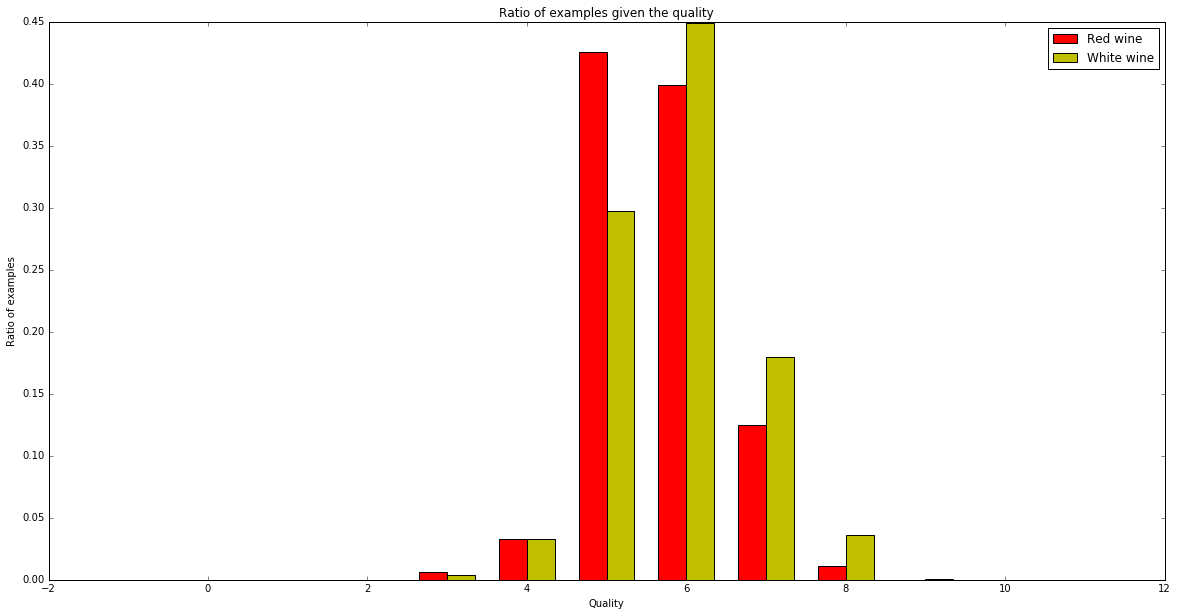

In [6]:
N = 11

# In order to compare red and white wines, we normalized our distributions
def targetDistribution(wine): 
    x = 1./len(wine['quality'])
    distribution = [0 for _ in range(0,N)]
    for q in wine['quality']:
        distribution[q]+=x
    return distribution

tdr =  targetDistribution(red)
tdw =  targetDistribution(white)

# Plot the bar chart
ind = np.arange(N)
width = 0.35

fig = plt.figure(figsize=(20,10))

p1 = plt.bar(ind-width, tdr, width, color='r')
p2 = plt.bar(ind, tdw, width, color='y')

plt.xlabel('Quality')
plt.ylabel('Ratio of examples')
plt.title('Ratio of examples given the quality')
plt.legend((p1[0], p2[0]), ('Red wine', 'White wine'))

plt.show()

## Question 3
*Comment on these distributions. How might they effect the analysis?*

For both kind of wines, the distribution seems to be a (discrete) Gaussian whose the mean is around 5 and 6, and the variance around 2. The main part of our predictions might be between 5 and 7.

The two kind of wines distributions are really similar. However white ones are more likely to have a better quality. The most represented predictions will have to be 5 in the Red wine's case and 6 in the white one.

## Question 4 : Linear Regression
### sub-question 4.a
*We will now concentrate on the red wine data. Randomly split the data into a training and test set with 70% of the examples in the training and 30% in the test.*

In [7]:
# Since we concentrate on red wine, we will first rename the red dataset
dataset = red
features = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide',\
             'total_sulfur_dioxide','density','pH','sulphates','alcohol']

# Random split : 70% training, 30% test data
test = dataset.sample(frac=.3)
training = dataset.drop(test.index.values.tolist())

print 'Converted fraction of the dataset into training data : ', 100*float(len(training))/float(len(dataset)), '% \n'

print 'Training data :'
training.head()

Converted fraction of the dataset into training data :  69.9812382739 % 

Training data :


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
6,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
8,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [8]:
# We'll use m later (cf. sub-question 4.e): mean of the target on the training data
m = np.mean(training['quality'])

In [9]:
print 'Converted fraction of the dataset into test data : ', 100*float(len(test))/float(len(dataset)), '% \n'

print 'Test data :'
test.head()

Converted fraction of the dataset into test data :  30.0187617261 % 

Test data :


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1139,8.2,0.510,0.24,2.0,0.079,16,86,0.99764,3.34,0.64,9.5,6
1208,7.2,0.360,0.46,2.1,0.074,24,44,0.99534,3.40,0.85,11.0,7
351,9.1,0.795,0.00,2.6,0.096,11,26,0.99940,3.35,0.83,9.4,6
1198,7.7,0.260,0.26,2.0,0.052,19,77,0.99510,3.15,0.79,10.9,6
96,6.8,0.775,0.00,3.0,0.102,8,23,0.99650,3.45,0.56,10.7,5


### sub-question 4.b
*Fit a linear regression to the training data.*

In [10]:
# We begin by introducing the objects used for the linear regression : t the the target vector and x the features matrix.
t = training['quality']
t = np.array(t)
print t

[5 5 5 ..., 6 6 5]


In [11]:
x = training[features]
x = np.array(x)
print x[0]

[  7.4      0.7      0.       1.9      0.076   11.      34.       0.9978
   3.51     0.56     9.4   ]


#### Create the X matrix
I spent some time to understand how to create the *X* matrix in the case of multiple features. Indeed, we saw in course the linear case of an unique feature where :

$$  X = \left( \begin{array}{cc}
x_0^0 & x_0^1 \\
x_1^0 & x_1^1 \\
x_2^0 & x_2^1 \\
... & ... \end{array} \right).$$

But where to add a second feature ? It would mean *a priori* to add a second matrix similar to the one above... What about a tensor of order 3 ? Not so easy to use in a generalisation of the course...

Let study again the definition of *X*. Our goal is to predict **t** by applying to **x** the model : $ t = \sum_k w_k W_k (\textbf{x}) $ where *W_k* is a function applyed to **x**. Thus, in the case of a linear regression with one unique feature, we want : $ t = \sum_k w_k x^k$. Here, we apply the functions to **x** : $ W_k : \textbf{x} \mapsto x^k $.

All the key is to understand what object is **x** ? Actually, it's a vector, which was not so obvious (at least for me) in the unique feature case. Thus, in our multiple features case, we want to apply the following model :

$$ t = w_0 + \sum_k w_k x_k $$

So *W_k* is a function from the 11 dimensions feature space to our unidimensional target space : $\forall k \in [1,11], W_k : \textbf{x} \mapsto x_k $ and $ W_0 : \textbf{x} \mapsto 1 $. This new understanding leads us to the general definition of *X* :

$$  X = \left( W_j ( \textbf{x}_i ) \right)_{i,j} $$

In our case, we get so :

$$  X = \left( \begin{array}{cccc}
1 & x_{01} & x_{02} & ... & x_{0f} \\
1 & x_{11} & x_{12} & ... & x_{1f} \\
1 & x_{21} & x_{22} & ... & x_{2f} \\
... & ...  & ... & ... & ... \end{array} \right).$$

In [12]:
def createX(x):
    l = len(x)
    X = [[1 for _ in range(0,12)] for _ in range(0,l)]

    for i in range(0,l):
        for j in range(0,11):
            X[i][j+1] = x[i][j]
    return X  

X = createX(x)
print X[1]

[1, 7.7999999999999998, 0.88, 0.0, 2.6000000000000001, 0.098000000000000004, 25.0, 67.0, 0.99680000000000002, 3.2000000000000002, 0.68000000000000005, 9.8000000000000007]


In [13]:
# Application of the course :
def linearRegression(X,t):
    Xt = np.transpose(X)
    return np.dot(np.dot(np.linalg.pinv(np.dot(Xt,X)),Xt),t)

w = linearRegression(X,t)
print 'w =',w

w = [  2.18363056e+01   2.57311685e-02  -1.15780210e+00  -1.97671908e-01
   2.58792621e-02  -2.05690861e+00   2.94727950e-03  -2.10095152e-03
  -1.75940534e+01  -5.57106112e-01   8.74165437e-01   3.08662725e-01]


In [14]:
def predict(w,x_new):
    return w[0]+ np.sum([w[k+1]*x_new[k] for k in range(0,len(w)-1)])

tt = test['quality']
tt = np.array(tt)

test = np.array(test)

# build a set of prediction given a dataset o
def buildPrediction(w,test):
    l0 = len(test)
    prediction= []
    for i in range(0,l0):
        p = predict(w,test[i])
        prediction.append(p)
    return prediction

In [15]:
prediction = buildPrediction(w,test)
print prediction[:5]

[5.2436141652450772, 6.1263649477685593, 5.1748092452442478, 6.3133242914466035, 5.294803887613778]


### sub-question 4.c
*Make a scatter plot the predictions versus the true targets for the test set and compute the mean squared error on the test set.*

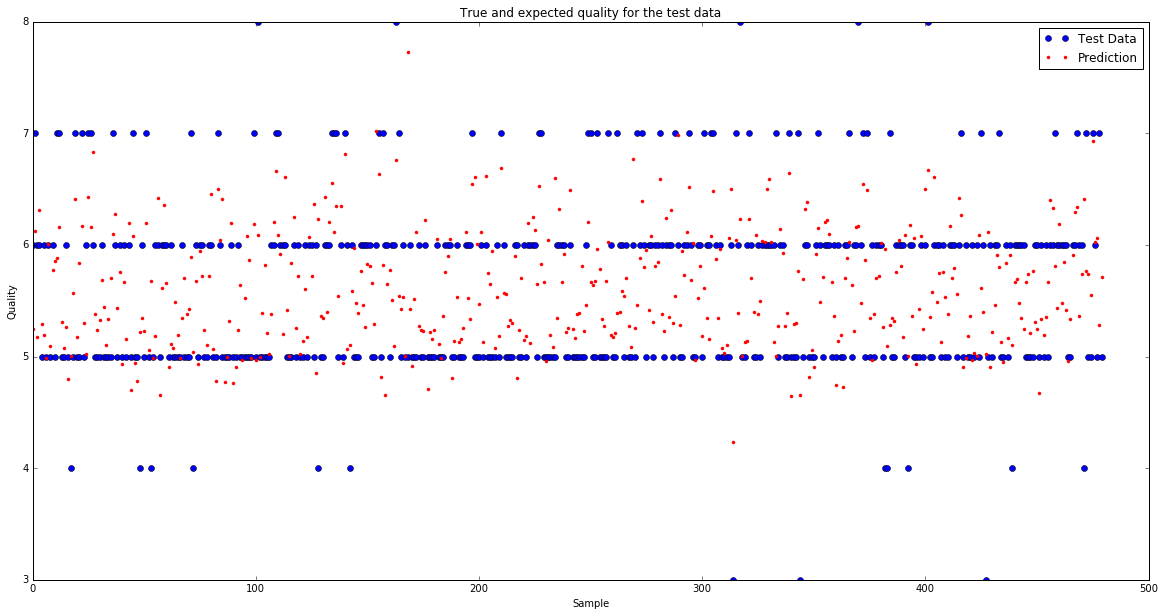

In [16]:
def comparePlot(tt,prediction):
    l0 = len(tt)
    
    fig = plt.figure(figsize=(20,10))

    p1 = plt.plot( range(0,l0),tt,'bo')
    p2 = plt.plot( range(0,l0),prediction,'r.')


    plt.xlabel('Sample')
    plt.ylabel('Quality')
    plt.title('True and expected quality for the test data')
    plt.legend((p1[0], p2[0]), ('Test Data', 'Prediction'))

    plt.show()
    
comparePlot(tt,prediction)

The continuity of the linear regression cannot give back the discrete aspect of the target. By using the function $\texttt{round}$, we increase the MSE, despite the output is more "similar" to the target.

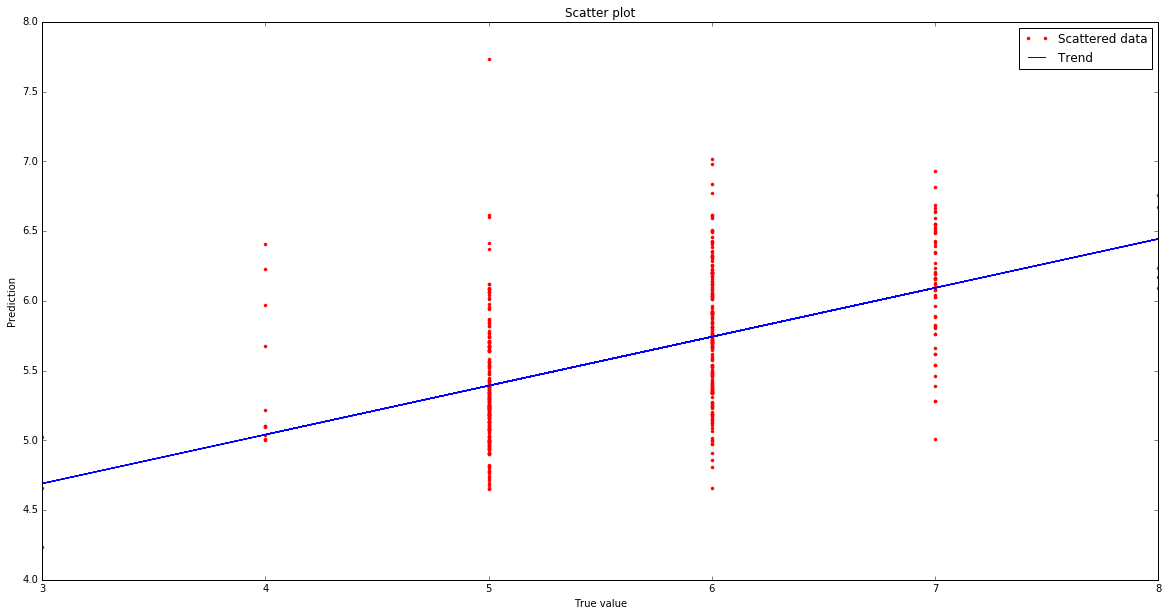

In [17]:
def scatterPlot(tt,prediction):
    # Trend part
    scatterX = np.array([[1,tt[i]] for i in range(len(tt))])
    scatterW = linearRegression(scatterX,prediction)
    TT = [[tt[i]] for i in range(len(tt))]
    
    # Whole plot
    fig = plt.figure(figsize=(20,10))
    
    p1 = plt.plot( tt,prediction,'r.')
    p2 = plt.plot(tt, [predict(scatterW,TT[i]) for i in range(len(tt))],'b-')
    plt.xlabel('True value')
    plt.ylabel('Prediction')
    plt.title('Scatter plot')
    plt.legend((p1[0], p2[0]), ('Scattered data', 'Trend'))
    plt.show()
    
scatterPlot(tt,prediction)

The linear regression of the predicted value given the true one is used as an easy approximation of the principal component of the points of the scatter plot. It gives an idea of the correlation between predictions and real values.

In [18]:
def meanSquaredError(test,prediction):
    l0 = len(test)
    r = 0
    for i in range(0,len(test)):
        r += (test[i]-prediction[i])**2
    return float(r)/float(l0)

print 'Mean Squared Error = ', meanSquaredError(tt,prediction)

Mean Squared Error =  0.451715901552


### sub-question 4.d
*Suggest a benchmark that you could use to decide if this mean squared error value is good.*

We could imagine a program which will always return the mean *m* of the target computed from the training data as a prediction. If the MSE is better with our previous regression than this simple program (whose the MSE is the variance of our data), we can accept the model.

### sub-question 4.e
*Implement your benchmark.*

In [19]:
mm = [m for _ in range(0,len(tt))]
print 'Mean Squared Error = ', meanSquaredError(tt,mm)

Mean Squared Error =  0.617956416946


### sub-question 4.f
*Briefly discuss the linear regression performance with respect to the benchmark.*

The benchmark give the reference value around 0.6, whereas the MSE of our linear regression is around 0.45 : our work gives better predictions than just returning always the same value, despite the variance of the quality is not so high (most of the target is 5 or 6). Thus, our work improved significantly the predictions we could make naively.

## Question 5 : Regularized Linear Expression
### sub-question 5.a
<p style="text-align:justify";>*Implement regularized least squares and make a plot of the test performance versus the regularization parameter.*</p>

#### Implementation

In [20]:
def rLinearRegression(X,t,r):
    Xt = np.transpose(X)
    aux = np.dot(Xt,X)
    l = len(aux)
    return np.dot(np.dot(np.linalg.pinv(np.add(np.dot(Xt,X),r*np.identity(l))),Xt),t)

#### Example : case r=2

In [21]:
w = rLinearRegression(X,t,2)
print 'w =', w

w = [ 0.94578307  0.05495201 -1.12483936 -0.21483138  0.01361439 -0.77652667
  0.0025421  -0.00130994  0.91971117 -0.03033943  0.72513808  0.34906171]


In [22]:
prediction = buildPrediction(w,test) 
print prediction[:10]

[5.2614451684956318, 6.0804905670562608, 5.2069214350513455, 6.1521499344285733, 5.3524105504966499, 5.1737195112402965, 5.039310675672608, 6.0077694180445818, 5.1376404752400262, 5.7926314075148806]


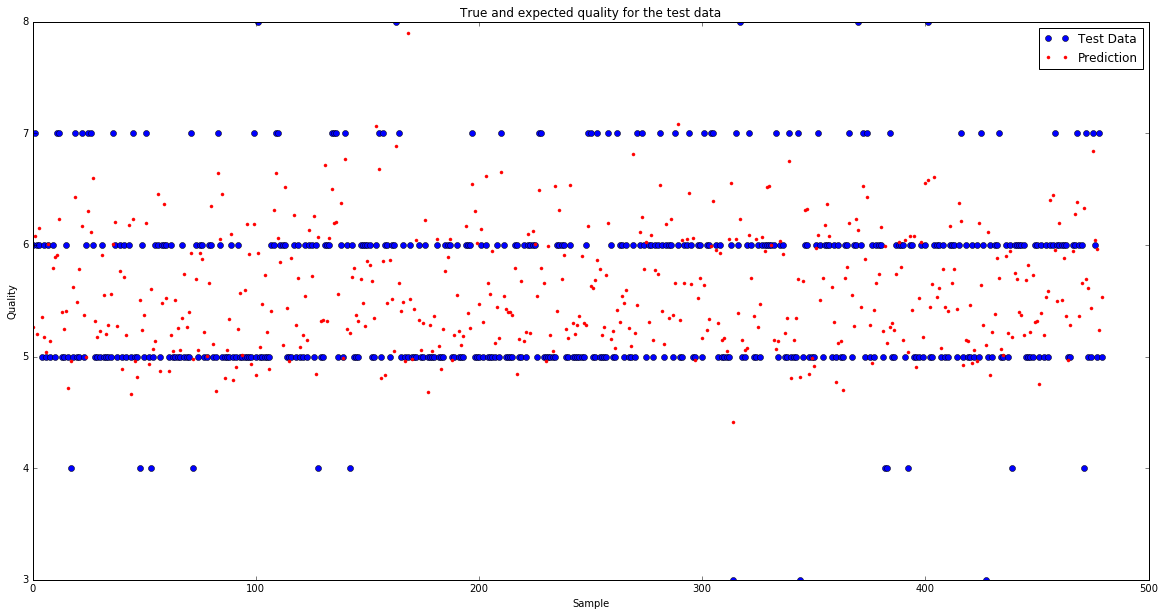

In [23]:
comparePlot(tt,prediction)

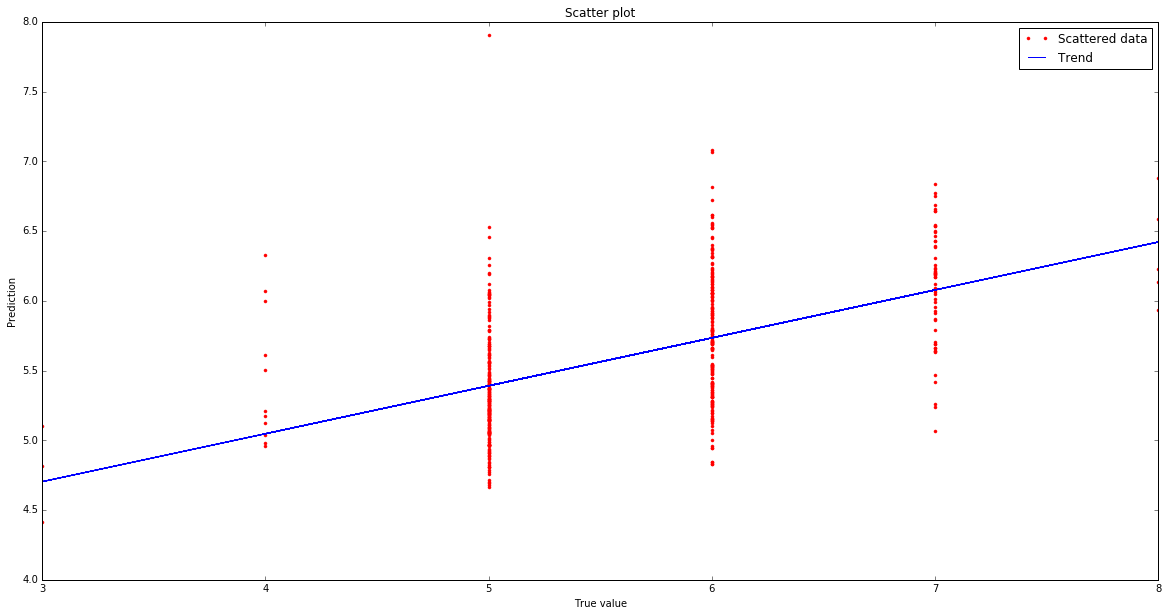

In [24]:
scatterPlot(tt,prediction)

In [25]:
print 'Mean Squared Error = ',meanSquaredError(tt,prediction)

Mean Squared Error =  0.455069993723


#### Choice of the Regularization Parameter

In [26]:
f = lambda r : meanSquaredError(tt,buildPrediction(rLinearRegression(X,t,r),test))
best_r = opt.fmin(f,1)[0]
print best_r

Optimization terminated successfully.
         Current function value: 0.451663
         Iterations: 16
         Function evaluations: 32
0.2376953125


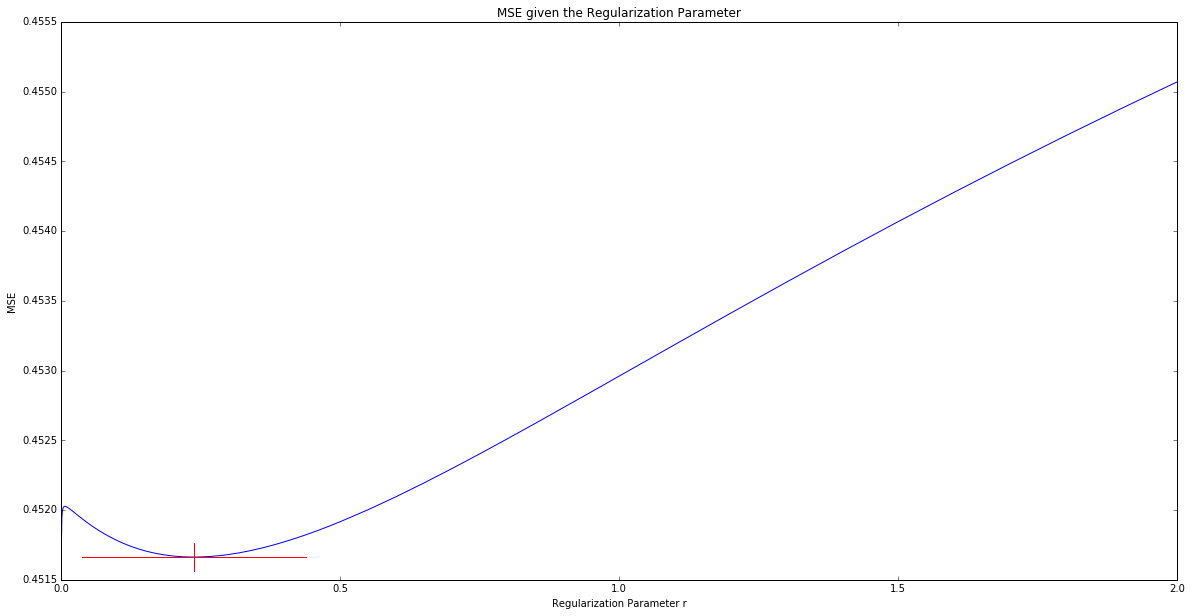

In [27]:
rho = [round((0.001*i),3) for i in range(301)]\
    + [round(0.3+(0.01*(i+1)),2) for i in range(20)]\
    + [round(0.5+(0.05*(i+1)),2) for i in range(10)]\
    + [round(1+(0.1*(i+1)),2) for i in range(10)]

mse = [f(rho[i])for i in range(len(rho))]

fig = plt.figure(figsize=(20,10))

p1 = plt.plot( rho,mse,'b-')
p2 = plt.plot([best_r-.2,best_r,best_r+.2],[f(best_r),f(best_r),f(best_r)],'r-')
p3 = plt.plot([best_r,best_r,best_r],[f(best_r)-.0001,f(best_r),f(best_r)+.0001],'r-')

plt.xlabel('Regularization Parameter r')
plt.ylabel('MSE')
plt.title('MSE given the Regularization Parameter')

plt.show()

### sub-question 5.b
<p style="text-align:justify";>*Describe why this is not a good way of determining the value of the regularization parameter.*</p>

Actually we are training our algorithm on the validation data. The performance seems better but we lost the generality of the algorithm. A good way should be to split the training data and to do this second step of tuning the regularizing parameter still inside the training data.

### sub-question 5.c
<p style="text-align:justify";>*Implement a 10-fold CV on the training data and use this to determine the value of the regularization parameter. Quote the optimal value, and the performance at this value on the test set.*</p>

In [28]:
def split(dataset,k):
    L = []
    aux0 = dataset
    for i in range(k-1):
        aux1 = aux0.sample(frac=(1./(k-i)))
        aux0 = aux0.drop(aux1.index.values.tolist())
        L.append(aux1)
    L.append(aux0)
    return L

In [29]:
def kCVrLinReg(dataset,k):
    L = split(dataset,k)
    def phi(L,par):
        err = []
        for test0 in L:
            tt0 = np.array(test0['quality'])
            training0 = dataset.drop(test0.index.values.tolist())
            test00 = np.array(test0)
            x0 = np.array(training0[features])
            X0 = createX(x0)
            t0 = np.array(training0['quality'])
            # Application of the algorithm :
            err.append(meanSquaredError(tt0,buildPrediction(rLinearRegression(X0,t0,par),test00)))   
            
        return np.mean(err)
    
    
    f = lambda p : phi(L,p)
    best_par = opt.fmin(f,0,disp=False)[0]
    best_err= f(best_par)
    return best_par, best_err
        
kCVrLinReg(training,10)

(0.12806250000000008, 0.41660459468917022)

### sub-question 5.d
<p style="text-align:justify";>*Compare the performance with the standard linear regression case, discussing possible reasons for any change in performance.*</p>

By adding a regularization term, we limit the cost of model which will fit too much the training data (the more complicated is a model, the more likely it might overfit). Thus, we can manage to decrease a bit more the error from the unreggularized linear regression.

## Question 6 : Classification
### sub-question 6.a
*Describe one limitation of using regression for this particular task?*

Regression needs to be fed by an explicit model : for instance, we saw that the continuity doesn't really fit the discrete side of the target. By using classification, we abandon the idea to constraint our prediction on an explicit model. 

### sub-question 6.b
*Pick either Naive Bayes or KNN. Describe a positive and a negative feature of your classifier with respect to this class.*

We will implement the KNN algorithm. Indeed, this algorithm is quite simple to implement if we can manage to do the two following hypothesis :

    - We can define a distance in our feature space.
    - The application from the feature space to the target one is continuous.

By the way, the definition of the boundary is not so easy to explicit : we will apply the algorithm for each point of the dest data.

### sub-question 6.c
*Describe any data pre-processing that you suggest for this data and your chosen classifier.*

KNN is a supervised clustering algorithm : to each point of the training data is attached a label (here the quality). We will re-shape a little the way the data is presented before to apply the algorithm. Then, the data will contain pairs (point,label).

By the way, we also need to define a distance. We will use the following distance :

$$ distance(\textbf{x},\textbf{y}) = || \textbf{x}-\textbf{y} ||_2^2 = (\textbf{x}-\textbf{y})^T (\textbf{x}-\textbf{y}) $$

By the way, we're not studying too much the feature space : we could normalize the dimensions, select only the most relevant features...

### sub-question 6.d
*Implement your classifier and optimize its parameters. Make sure your optimization is clearly commented. Use classification accuracy as your figure of merit.*
#### Implementation

In [30]:
def kNearestNeighbours(newPoint, dataset, k):
# newPoint   : element whose we want the label
# dataset : dataset of pairs (element, label)
# k          : parameter of the k-nn algorithm
    
    def distance(x,y):
        d = 0
        for i in range(0,11):
            d+=(x[i]-y[i])**2
        return d
    
    # We sort the dataset : the closest elements to newPoint first
    sortedDataset = sorted(dataset, key= lambda x : distance(newPoint,x[0]))

    # We pick the k closest/first elements
    neighbours = sortedDataset[0:k]

    # We create the list of the different labels present in the k nearest neighbours, we count them
    from collections import Counter
    labelList = [n[1] for n in neighbours]
    labelList = Counter(labelList).most_common()
    
    # We select one of the most present labels
    L=[labelList[0][0]]	
    
    for k in range(0,len(labelList)):
        if labelList[k][1]==labelList[0][1]:
            L.append(labelList[k][0])

    # We pick one
    return rd.choice(L)

#### Example : 1NearestNeighbours' predictions

In [31]:
training1 = np.array(training)
dataset = [[e[0:11],e[11]] for e in training1]

def buildKNNPrediction(test,dataset,k):
        prediction = []
        for i in range(0,len(test)):
            p = kNearestNeighbours(test[i],dataset,k)
            prediction.append(p)
        return prediction
    
prediction = buildKNNPrediction(test,dataset,1)
    
print prediction[:5]

[5.0, 7.0, 5.0, 5.0, 5.0]


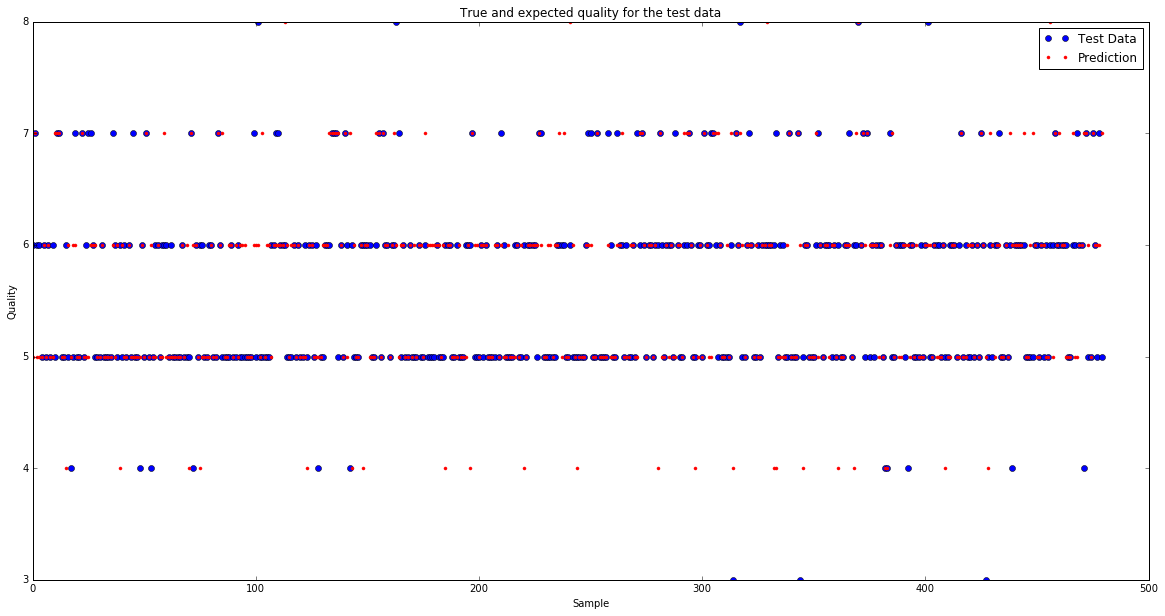

In [32]:
comparePlot(tt,prediction)

In [33]:

print 'Mean Squared Error = ',meanSquaredError(tt,prediction)

Mean Squared Error =  0.7375


In [34]:
def zeroOneLoss(testDataset,trainDataset,k):
    l=0
    for e in testDataset :
        if kNearestNeighbours(e[0:11],trainDataset,k)==e[11] :
            l+=1
    return float(l)/len(testDataset)

loss = zeroOneLoss(test,dataset,1)
print '0/1 Loss (in percentage) : ',100*loss,'%'

0/1 Loss (in percentage) :  57.9166666667 %


#### Optimization

In any case, we use 10-fold cross validation.

In [35]:
def kCV01Loss(dataset,k_list,k):
    L = split(dataset,k)
    def phi(L,par):
        err = []
        for test0 in L:
            training0 = np.array(dataset.drop(test0.index.values.tolist()))
            test00 = np.array(test0)
            dataset0 = [[e[0:11],e[11]] for e in training0]
            # Application of the algorithm :
            err.append(zeroOneLoss(test00,dataset0,par))   
            
        return np.mean(err)
    
    
    f = lambda p : phi(L,p)
    return [f(k) for k in k_list]

k_list = range(0,201,2)[1:]
fk_list = kCV01Loss(training,k_list,10)

index = np.argmax(fk_list)
best_k = k_list[index]
best_fk = fk_list[index]

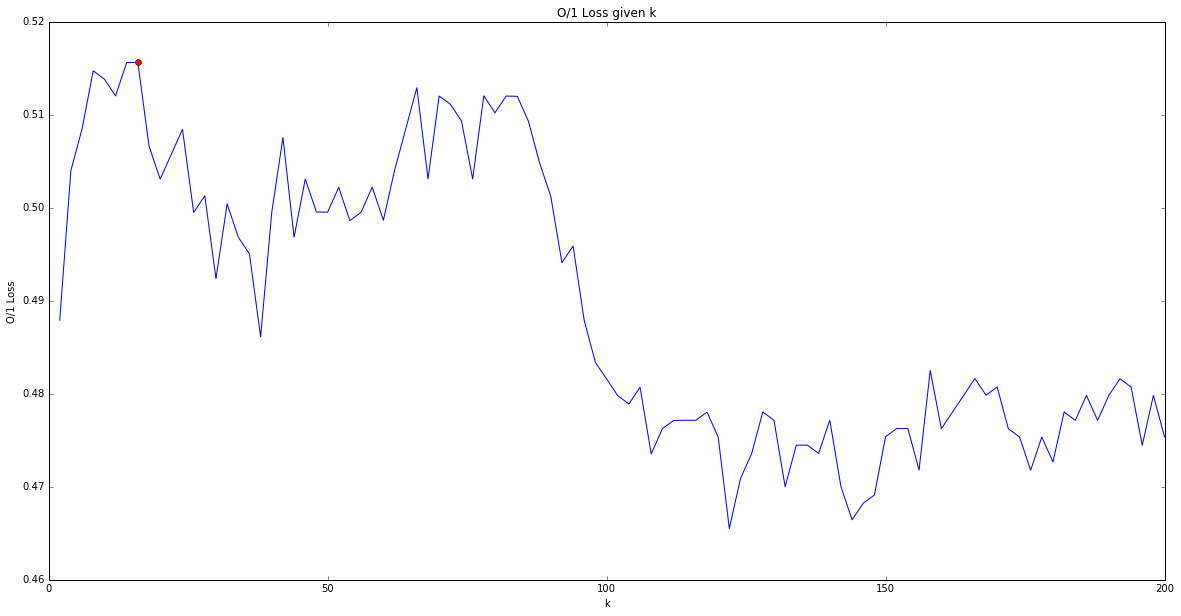

In [36]:
fig = plt.figure(figsize=(20,10))

p1 = plt.plot( k_list,fk_list,'b-')
p2 = plt.plot([best_k],[best_fk],'ro')

plt.xlabel('k')
plt.ylabel('O/1 Loss')
plt.title('O/1 Loss given k')

plt.show()

##### Can we still use MSE ?

0/1 Loss measures how many time in average can we guess the good value. However, it will not quantify the mistake I make ; what is better between predict 8 instead of 4 and predict 5 instead of 4 ? Thus, studying MSE instead of 0/1 Loss may be interesting.

In [42]:
def kCVMSE(dataset,k_list,k):
    L = split(dataset,k)
    
    def phi(L,par):
        err = []
        for test0 in L:
            training0 = np.array(dataset.drop(test0.index.values.tolist()))
            test00 = np.array(test0)
            dataset0 = [[e[0:11],e[11]] for e in training0]
            
            tt0 = np.array(test0['quality'])
            p0 = buildKNNPrediction(test00,dataset0,par)
            # Application of the algorithm :
            err.append(meanSquaredError(tt0,p0))   
            
        return np.mean(err)
    
    
    f = lambda p : phi(L,p)
    return [f(k) for k in k_list]

k_list = range(0,201,2)[1:]
fk_list = kCVMSE(training,k_list,10)

index = np.argmin(fk_list)
best_k = k_list[index]
best_fk = fk_list[index]

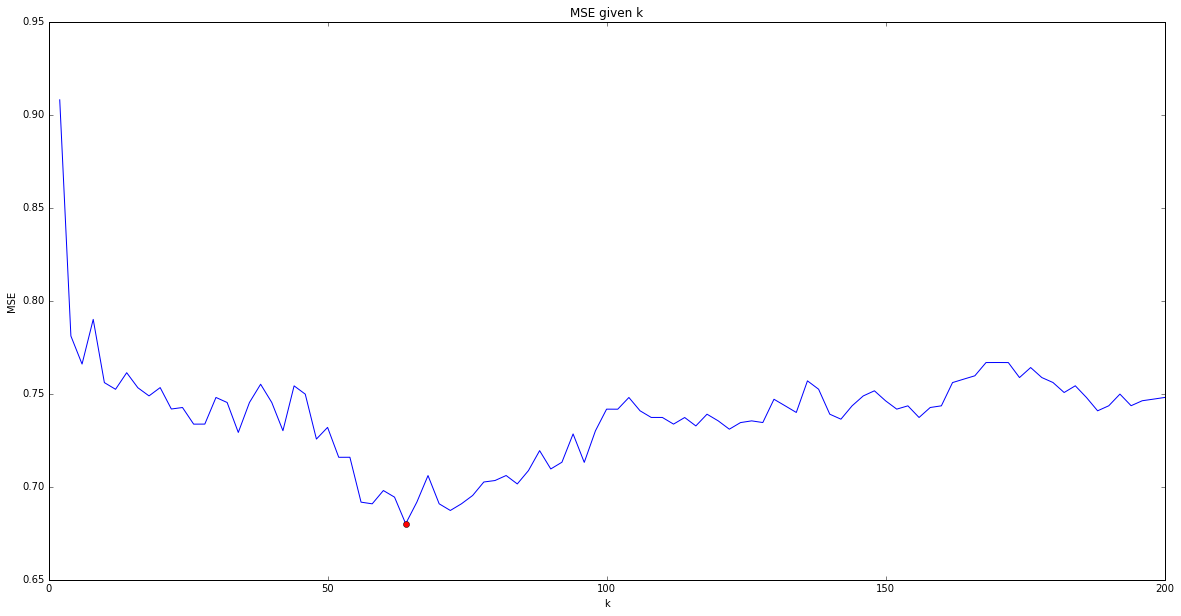

In [43]:
fig = plt.figure(figsize=(20,10))

p1 = plt.plot( k_list,fk_list,'b-')
p2 = plt.plot([best_k],[best_fk],'ro')

plt.xlabel('k')
plt.ylabel('MSE')
plt.title('MSE given k')

plt.show()

In [44]:
best_k

64

We need to redefine the benchmark : instead of choosing the average, we choose the most likely integer.

In [39]:
m = 5
mm = [m for _ in range(0,len(tt))]

In [40]:

print 'Mean Squared Error = ', meanSquaredError(tt,mm)

Mean Squared Error =  1.00833333333


### sub-question 6.e
*Display the confusion matrix on the test data.*

The performance of the KNN algorithm is accepted after having redesigned the benchmark. However, we can notice that the better is the MSE, worst is the 0/1 Loss. In other words, MSE is a good measure to say how much we're closed of the good answer but not how much we are exact. Thus, we should find a compromise between this two ways of measuring performances.

For instance, k=60 or 70 could be good values.

In [41]:
def confusionMatrix(testDataset,trainDataset,k):    
    M = [[0 for _ in range(11)] for _ in range(11)]
    for e in testDataset :
        M[int(e[11])][int(kNearestNeighbours(e[0:11],trainDataset,k))]+=1
    return M

np.matrix(confusionMatrix(test,dataset,1))

matrix([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   1,   1,   1,   0,   0,   0,   0],
        [  0,   0,   0,   0,   2,   3,   4,   2,   0,   0,   0],
        [  0,   0,   0,   0,   7, 142,  59,   8,   0,   0,   0],
        [  0,   0,   0,   0,  12,  50, 102,  20,   4,   0,   0],
        [  0,   0,   0,   0,   1,   8,  17,  31,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   3,   1,   1,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

### sub-question 6.f
*Discuss the performance and suggest a way in which they could be improved.*

The confusion matrix is quite diagonal, which means that the prediction fits quite well the true target. The algorithm is generally confused on rare targets : indeed, the bigger is k, the less represented they will be.

## Bonus question
<p style="text-align:justify";>*The data was originally published in Modeling wine preferences by data mining from physicochemical properties, Cortez et al, Decision Support Systems 47(4). Write a review of this paper, focusing on the Machine Learning methods chosen and Assumptions taken. Include a description of how you might advance the work.*</p>

__This should be submitted as a separate PDF file.__